In [1]:
from sklearn.datasets import load_iris
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from copy import deepcopy

In [2]:
iris = load_iris()
samples = iris.data

In [3]:
iris.feature_names

['sepal length (cm)',
 'sepal width (cm)',
 'petal length (cm)',
 'petal width (cm)']

In [4]:
iris.target_names, iris.target

(array(['setosa', 'versicolor', 'virginica'], dtype='<U10'),
 array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
        1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
        1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
        2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
        2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2]))

In [5]:
samples[:5, 0], samples[:5, 1]

(array([5.1, 4.9, 4.7, 4.6, 5. ]), array([3.5, 3. , 3.2, 3.1, 3.6]))

In [6]:
x = samples[:,0] # sepal length
y = samples[:,1] # sepal width

In [7]:
sepal_length_width = np.array(list(zip(x, y)))

# Visualize Before K-Means

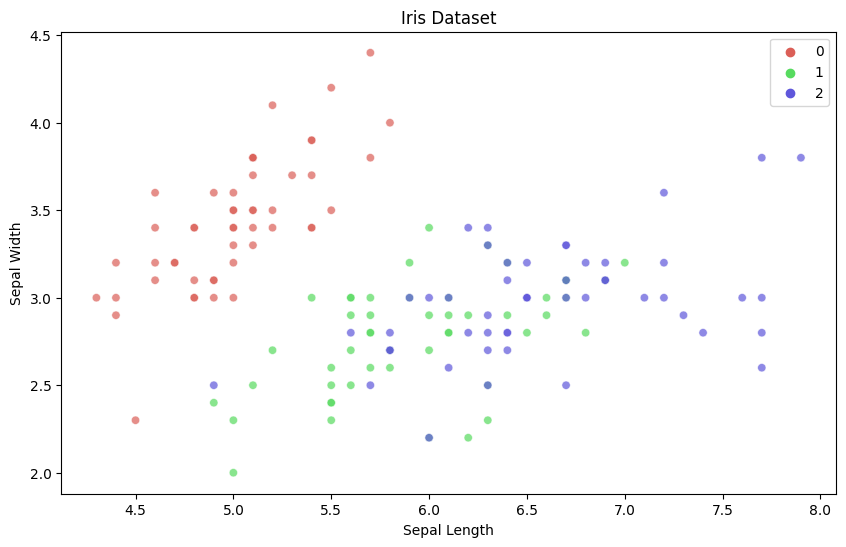

In [8]:
plt.figure(figsize=(10, 6))

sns.scatterplot(
    x=x,
    y=y,
    hue=iris.target,
    palette=sns.color_palette('hls', 3),
    alpha=0.7,
)

plt.title('Iris Dataset')
plt.xlabel('Sepal Length')
plt.ylabel('Sepal Width')
plt.show()

# Implement K-Means

**El algoritmo K-Means:**

1. Lugar k centríidos aleatorios para los grupos iniciales.
1. Asigne muestras de datos al centroide más cercano.
1. Actualice los centríidos en función de las muestras de datos asignadas anteriormente.

Repita los pasos 2 y 3 hasta la convergencia.

## Step 1: Place k random centroids for the initial groups.

In [9]:
# number of clusters
k = 3

# Create x coordinates of k random centroids
centroids_x = np.random.uniform(min(x), max(x), k)

# Create y coordinates of k random centroids
centroids_y = np.random.uniform(min(y), max(y), k)

In [10]:
# Create centroids array
centroids = np.array(list(zip(centroids_x, centroids_y)))
centroids[:5]

array([[4.62426027, 2.33348947],
       [5.17482062, 3.25200752],
       [7.83062235, 2.33156671]])

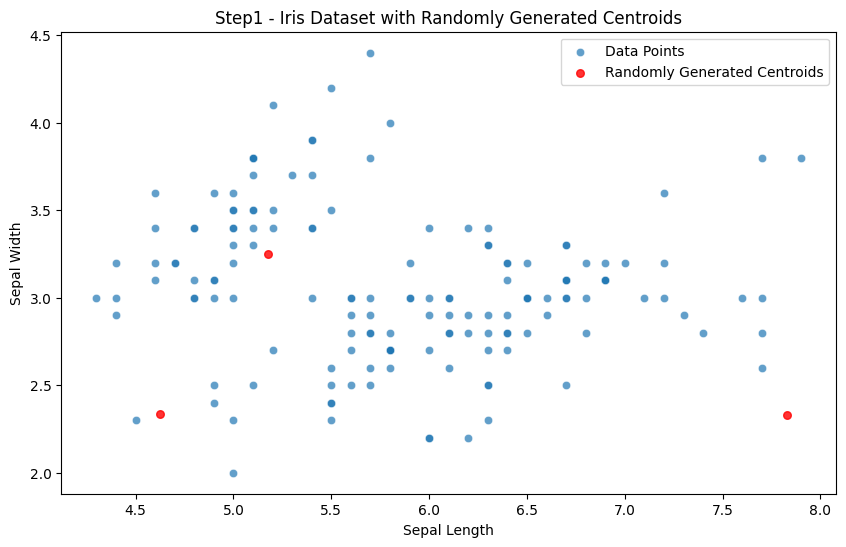

In [11]:
# Plot the centroids
plt.figure(figsize=(10, 6))

sns.scatterplot(
    x=x,
    y=y,
    # hue=iris.target,
    # palette=sns.color_palette('hls', 3),
    alpha=0.7,
    label='Data Points'
)

plt.scatter(centroids_x, centroids_y, c='red', s=30, alpha=.8, label='Randomly Generated Centroids')

plt.title('Step1 - Iris Dataset with Randomly Generated Centroids')
plt.xlabel('Sepal Length')
plt.ylabel('Sepal Width')
plt.legend()
plt.show()

## Step 2: Asignar muestras de datos al centroide más cercano

Ahora tenemos los tres centroides al azar. Asignemos puntos de datos a sus centroides más cercanos.

Para hacer esto vamos a usar un Fórmula de distancia escribir un distance() función. Luego, vamos a iterar a través de nuestras muestras de datos y calcular la distancia desde cada punto de datos a cada uno de los 3 centroides.

formula de distancia: $$\sqrt{(x_2-x_1)^2+(y_2-y_1)^2}$$

In [12]:
# distance between two points
distance = lambda a, b: np.sqrt((a[0] - b[0])**2 + (a[1] - b[1])**2)

In [13]:
# Cluster labels for each point (either 0, 1, or 2)
labels = np.zeros(len(samples))

# Distances to each centroid
distances = np.zeros(k)

In [14]:
for i in range(len(samples)):
    distances[0] = distance(samples[i], centroids[0])
    distances[1] = distance(samples[i], centroids[1])
    distances[2] = distance(samples[i], centroids[2])
    cluster = np.argmin(distances)
    labels[i] = cluster

In [15]:
print(labels)

[1. 1. 1. 1. 1. 1. 1. 1. 0. 1. 1. 1. 1. 0. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 0. 1. 1. 0. 1. 1. 1. 1. 1. 1.
 1. 1. 2. 1. 2. 0. 1. 1. 1. 0. 2. 1. 0. 1. 1. 1. 1. 2. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 2. 2. 2. 1. 1. 0. 0. 1. 1. 1. 1. 2. 1. 1. 1. 1. 1. 1. 0. 1. 1.
 1. 1. 0. 1. 1. 1. 2. 1. 1. 2. 0. 2. 2. 2. 1. 1. 2. 1. 1. 1. 1. 2. 2. 1.
 2. 1. 2. 1. 2. 2. 1. 1. 1. 2. 2. 2. 1. 1. 1. 2. 1. 1. 1. 2. 2. 2. 1. 2.
 2. 2. 1. 1. 1. 1.]


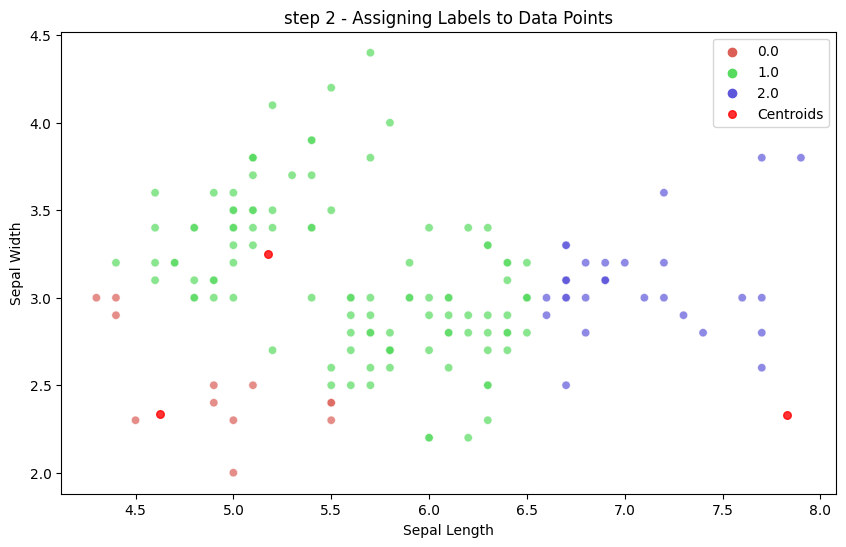

In [16]:
plt.figure(figsize=(10, 6))

sns.scatterplot(
    x=x,
    y=y,
    hue=labels,
    palette=sns.color_palette('hls', 3),
    alpha=0.7,
    # label='Data Points'
)

plt.scatter(centroids_x, centroids_y, c='red', s=30, alpha=.8, label='Centroids')

plt.title('step 2 - Assigning Labels to Data Points')
plt.xlabel('Sepal Length')
plt.ylabel('Sepal Width')
plt.legend()
plt.show()

## Step 3: Actualice los centroides en función de las muestras de datos asignadas anteriormente.

In [17]:
centroids_old = deepcopy(centroids)

In [18]:
sepal_length_width[:5]

array([[5.1, 3.5],
       [4.9, 3. ],
       [4.7, 3.2],
       [4.6, 3.1],
       [5. , 3.6]])

In [19]:
for i in range(k):
    # matriz llamada points donde obtenemos todos los puntos de datos que tienen la etiqueta del clúster i.
    points = [sepal_length_width[j] for j in range(len(sepal_length_width)) if labels[j] == i]
    # calcule la media de esos puntos usando .mean() para obtener el nuevo centroide.
    centroids[i] = np.mean(points, axis=0)

In [20]:
print(f'Old Centroids: {centroids_old}')
print(f'New Centroids: {centroids}')

Old Centroids: [[4.62426027 2.33348947]
 [5.17482062 3.25200752]
 [7.83062235 2.33156671]]
New Centroids: [[4.91666667 2.5       ]
 [5.61111111 3.11203704]
 [7.05       3.08333333]]


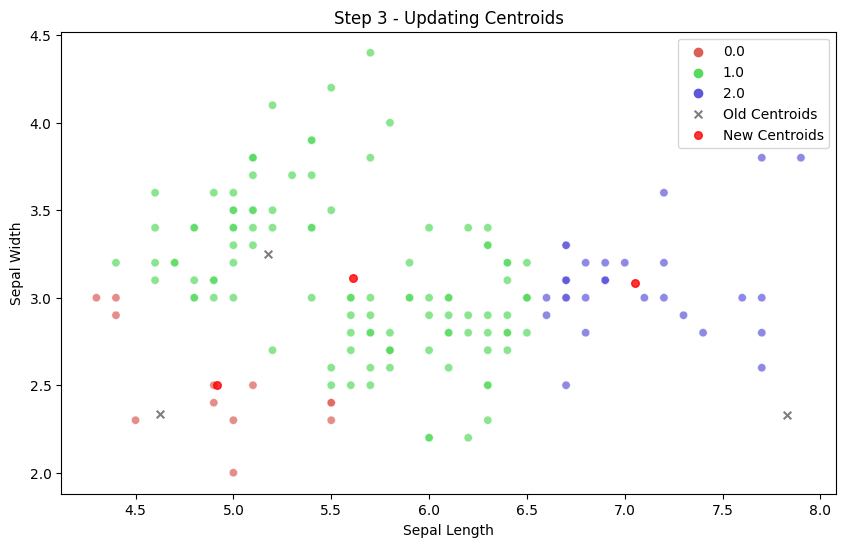

In [21]:
plt.figure(figsize=(10, 6))

sns.scatterplot(
    x=x,
    y=y,
    hue=labels,
    palette=sns.color_palette('hls', 3),
    alpha=0.7,
    # label='Data Points'
)

plt.scatter(centroids_x, centroids_y, c='black', s=30, alpha=.5, label='Old Centroids', marker='x')
plt.scatter(centroids[:,0], centroids[:,1], c='red', s=30, alpha=.8, label='New Centroids')

plt.title('Step 3 - Updating Centroids')
plt.xlabel('Sepal Length')
plt.ylabel('Sepal Width')
plt.legend()
plt.show()

## Step 4: Repita los pasos 2 y 3 hasta la convergencia.

En este paso, vamos a repetir los pasos 2 y 3 hasta que los centroides no cambien. Esto significa que los centroides no se mueven más y los puntos de datos ya no cambian de grupo.

In [22]:
error = np.zeros(k)

In [23]:
# Calculate error between old and new centroids
error[0] = distance(centroids_old[0], centroids[0])
error[1] = distance(centroids_old[1], centroids[1])
error[2] = distance(centroids_old[2], centroids[2])

In [24]:
while error.all() != 0:
    # Assigning each value to its closest cluster
    for i in range(len(samples)):
        distances[0] = distance(samples[i], centroids[0])
        distances[1] = distance(samples[i], centroids[1])
        distances[2] = distance(samples[i], centroids[2])
        cluster = np.argmin(distances)
        labels[i] = cluster

    # Storing the old centroid values
    centroids_old = deepcopy(centroids)

    # Finding the new centroids by taking the average value
    for i in range(k):
        points = [sepal_length_width[j] for j in range(len(sepal_length_width)) if labels[j] == i]
        centroids[i] = np.mean(points, axis=0)

    # error = np.zeros(k)
    error[0] = distance(centroids_old[0], centroids[0])
    error[1] = distance(centroids_old[1], centroids[1])
    error[2] = distance(centroids_old[2], centroids[2])

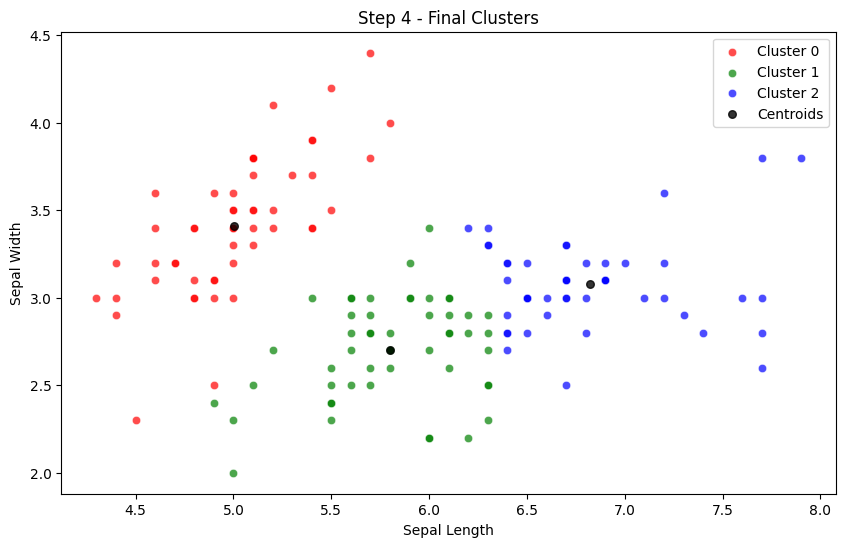

In [25]:
plt.figure(figsize=(10, 6))

colors = ['r', 'g', 'b']

for i in range(k):
    points = np.array([sepal_length_width[j] for j in range(len(sepal_length_width)) if labels[j] == i])
    sns.scatterplot(
        x=points[:,0],
        y=points[:,1],
        color=colors[i],
        alpha=0.7,
        label=f'Cluster {i}'
    )

plt.scatter(centroids[:,0], centroids[:,1], c='black', s=30, alpha=.8, label='Centroids')

plt.title('Step 4 - Final Clusters')
plt.xlabel('Sepal Length')
plt.ylabel('Sepal Width')
plt.legend()
plt.show()